# Which  Star Wars episode is a must-watch?
Star Wars is a well-known franchise series that has huge fan around the world. Before coming under the hood of Disney, there were 6 episodes that have been produced.

In this project, we will research the six original movies to find the most favorite episode and most favorable character using the [data](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) collected by FiveThirtyEight. This group carried out a survey asking questions regarding Star Wars movies.

Beside the survey questions about the Star Wars movies, it also collects some information about respondents:
- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Yes/No
- Do you consider yourself to be a fan of the Star Wars film franchise? - Yes/No

Here is the article published by [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/).

**Results:**
- Episode V: The Empire Strikes Back is a must-watch in the series.
- Episode I, II, III tend to disappoint Star Wars fans.
- Han Solo and Yoda are best characters of all.

In [1]:
# read in the data set
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding ='ISO-8859-1')

In [2]:
delete = pd.read_csv('star_wars.csv', encoding ='ISO-8859-1')
delete['RespondentID'].count()

1186

In [3]:
# show first five rows of all columns
pd.set_option('display.max_columns', None)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Clearning and transforming data

Some of the questions are multiple choices with varying format. We will need to transform this data set to be more user friendly.

First, the first row shows a record with NaN respondent ID, we will remove all rows with that null value.

Before removing the first row, we need to copy the values from column 3 to 29 as it should be used to rename the columns later

In [4]:
star_wars.iloc[:1,3:29]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [5]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

### The first two Questions - Yes/No Answer

For the first two questions with Yes/No answers:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Instead of having values in string format, we will convert it to boolean.

In [6]:
# check values in the first question
star_wars.iloc[:,1].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
# replace Yes/No string to True/False boolean
star_wars.iloc[:,1] = star_wars.iloc[:,1].map({'Yes': True, 'No': False})

In [8]:
# check values in the second question
star_wars.iloc[:,2].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
# replace Yes/No string to True/False boolean
star_wars.iloc[:,2] = star_wars.iloc[:,2].map({'Yes': True, 'No': False})

### Which of the following Star Wars films have you seen?
The next six columns are for participant to check in the box which movies they have seen. The name of movies are repeated in the answer showing they've seen it.<br>

This format is confusing. We will convert the values it to True/False with column names as seen_1 to seen_6 corresponding to the 6 episodes of the series:<br>
- seen_1 - Star Wars: Episode I The Phantom Menace	
- seen_2 - Star Wars: Episode II Attack of the Clones
- seen_3 - Star Wars: Episode III Revenge of the Sith
- seen_4 - Star Wars: Episode IV A New Hope
- seen_5 - Star Wars: Episode V The Empire Strikes Back
- seen_6 - Star Wars: Episode VI Return of the Jed

In [10]:
# original names of column 3-8
movies = star_wars.iloc[:,3:9].columns
movies

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [11]:
# rename columns
star_wars.rename(columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'},
    inplace = True)

Star Wars: Episode I The Phantom Menace	Star Wars: Episode II Attack of the Clones	Star Wars: Episode III Revenge of the Sith	Star Wars: Episode IV A New Hope	Star Wars: Episode V The Empire Strikes Back	Star Wars: Episode VI Return of the Jedi

In [12]:
# convert values in these columns
# a value with the name of movie = True, NaN = False
import numpy as np
value_mapping = {
    'Star Wars: Episode I  The Phantom Menace':True,
    'Star Wars: Episode II  Attack of the Clones':True,
    'Star Wars: Episode III  Revenge of the Sith':True,
    'Star Wars: Episode IV  A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True,
    np.nan:False}
for col_name in star_wars.columns[3:9]:
    star_wars[col_name] = star_wars[col_name].map(value_mapping)

### Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.

We will rename the next six columns for this question.

In [13]:
# rename columns
star_wars.rename(columns = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10':'rank_2',
    'Unnamed: 11':'rank_3',
    'Unnamed: 12':'rank_4',
    'Unnamed: 13':'rank_5',
    'Unnamed: 14':'rank_6'},
    inplace = True)

In [14]:
# convert values in those column to float type.
for col_name in star_wars.columns[9:15]:
    star_wars[col_name] = star_wars[col_name].astype(float)

### Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
We will rename the columns with the values from the first row which contains the character names.

For the values in columns, we will evaluate the favorite level based on number 1-5 as following:
- favorable - Very favorably
- somewhat_favorable - Somewhat favorably
- neutral - Neither favorably nor unfavorably (neutral)
- somewhat_unfavorable - Somewhat unfavorably
- unfavorable - Very unfavorably
- NaN - Unfamiliar (N/A)

In [15]:
star_wars.iloc[:,16].value_counts()

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int64

In [16]:
# rename columns
star_wars.rename(columns = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han_Solo',
    'Unnamed: 16':'Luke_Skywalker',
    'Unnamed: 17':'Princess_Leia_Organa',
    'Unnamed: 18':'Anakin_Skywalker',
    'Unnamed: 19':'Obi_Wan_Kenobi',
    'Unnamed: 20':'Emperor_Palpatine',
    'Unnamed: 21':'Darth_Vader',
    'Unnamed: 22':'Lando_Calrissian',
    'Unnamed: 23':'Boba_Fett',
    'Unnamed: 24':'C_3P0',
    'Unnamed: 25':'R2_D2',
    'Unnamed: 26':'Jar_Jar_Binks',
    'Unnamed: 27':'Padme_Amidala',
    'Unnamed: 28':'Yoda'},
    inplace = True)

In [17]:
# convert columns' values to numbers with levels of favorite
# 5 is the most, 1 is the least, nan is unfamiliar with character
favorite_mapping = {
    'Very favorably':'favorable',
    'Somewhat favorably':'somewhat_favorable',
    'Neither favorably nor unfavorably (neutral)':'neutral',
    'Somewhat unfavorably':'somewhat_unfavorable',
    'Very unfavorably':'unfavorable',
    'NaN - Unfamiliar (N/A)':np.nan
}
for col_name in star_wars.columns[15:29]:
    star_wars[col_name] = star_wars[col_name].map(favorite_mapping)

The rest of columns look fine.

## Analyze Data
Here is the cleaned data set to start the analysis

In [18]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,Han_Solo,Luke_Skywalker,Princess_Leia_Organa,Anakin_Skywalker,Obi_Wan_Kenobi,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,Boba_Fett,C_3P0,R2_D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,favorable,favorable,favorable,favorable,favorable,favorable,favorable,NaN,NaN,favorable,favorable,favorable,favorable,favorable,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,somewhat_favorable,somewhat_favorable,somewhat_favorable,somewhat_favorable,somewhat_favorable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,favorable,favorable,favorable,favorable,favorable,somewhat_favorable,favorable,somewhat_favorable,somewhat_unfavorable,favorable,favorable,favorable,favorable,favorable,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,favorable,somewhat_favorable,somewhat_favorable,somewhat_unfavorable,favorable,unfavorable,somewhat_favorable,neutral,favorable,somewhat_favorable,somewhat_favorable,unfavorable,somewhat_favorable,somewhat_favorable,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Which movie has highest rank?
We will consider rank columns and based on the mean of values for each column to answer this question.

Recall the main question for these 6 columns:
**Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.**<br>

The number in the column names correspond to the episode of series.
- rank_1 - Star Wars: Episode I The Phantom Menace
- rank_2 - Star Wars: Episode II Attack of the Clones
- rank_3 - Star Wars: Episode III Revenge of the Sith
- rank_4 - Star Wars: Episode IV A New Hope
- rank_5 - Star Wars: Episode V The Empire Strikes Back
- rank_6 - Star Wars: Episode VI Return of the Jed


In [19]:
ranking = star_wars.iloc[:,9:15].mean()
ranking.sort_values(inplace = True)

In [20]:
# use plot style: fivethirtyeight 
import matplotlib.style as style
style.use('fivethirtyeight')

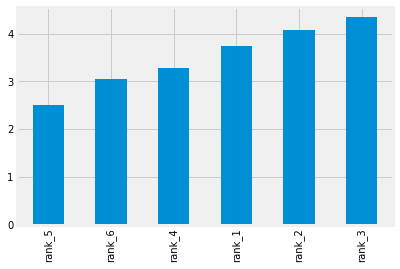

In [21]:
ranking.plot.bar()

rank_5 - Star Wars: Episode V The Empire Strikes Back has the smallest mean. This means on average, this movie is ranked highest among the others.

The next in line is Episode VI.

Episode II and III are on the bottom of the list for ranking.

### How many participant have seen the movies?
The number in the column names also correspond to the episode of series.
We converted the values in these columns to True and False for seen and not_seen respectively.

In [22]:
seen_movies = star_wars.iloc[:,3:9].sum()
seen_movies.sort_values(inplace = True, ascending = False)

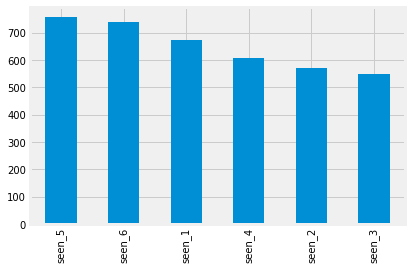

In [23]:
seen_movies.plot.bar()

More than 700 participants have seen the highest ranked Star Wars movies episode V and VI.

It seems the majority of participant knows Episode V is the best of all. We will check this theory again by consider "fan" factor.

It is normal for a fan of Star Wars to watch all of episodes. The popularity of an episode can be somewhat reflected by the number of non-fan participants have seen it.

In [24]:
fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
seen_cols = ['seen_1','seen_2','seen_3','seen_4','seen_5', 'seen_6']
seen = star_wars.groupby(fan)[seen_cols].sum()
seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,173.0,108.0,100.0,124.0,220.0,201.0
True,500.0,463.0,450.0,483.0,538.0,537.0


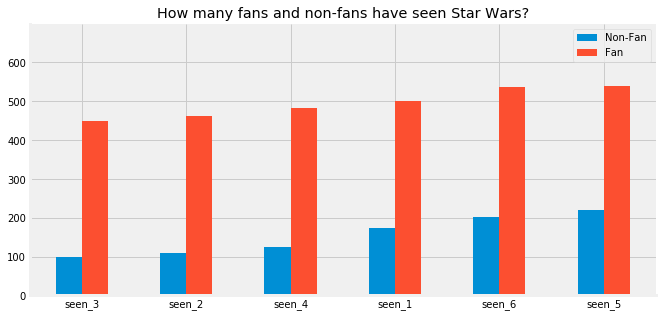

In [25]:
import matplotlib.pyplot as plt
ax = seen.transpose().sort_values(True).plot.bar(rot = 0, figsize =(10,5))
plt.title('How many fans and non-fans have seen Star Wars?')
plt.legend(('Non-Fan', 'Fan'), loc=1)
plt.ylim(0,700)
plt.yticks(np.arange(0,601,100))
for pos in ('top','right'):
    ax.spines[pos].set_visible(False)
plt.show()

More than 200 participants have seen episode 5 even though they are not a fan. 

One thing to point out is Episode IV was the first to be released. It started to attract attention from viewers. The movies do well for episode V. But from there, it seems to disapoint the viewers with the number of views kept going down.

Episode 5 is proved to be the best of all.

### Which character is favored the most?

In [26]:
# filter out columns for characters
characters = star_wars.iloc[:,15:29]

In [27]:
# create an empty DataFrame
characters_freq = pd.DataFrame()
# find the frequency of favorability rating for each character
for col in characters.columns:
    characters_freq[col] = round(characters[col].value_counts(
                            normalize = True)*100,1)

In [28]:
characters_freq = characters_freq.transpose()

In [29]:
characters_freq.sort_values('favorable',inplace = True)

In [30]:
characters_freq.reset_index(inplace=True)

In [31]:
characters_freq.rename(columns = {'index':'characters'}, inplace = True)
characters_freq

,characters,favorable,somewhat_favorable,neutral,somewhat_unfavorable,unfavorable
0,Jar_Jar_Binks,15.7,18.3,23.0,14.3,28.7
1,Emperor_Palpatine,16.7,21.7,32.4,10.3,18.8
2,Boba_Fett,20.3,22.5,36.5,14.1,6.6
3,Lando_Calrissian,21.1,33.2,35.1,9.4,1.2
4,Padme_Amidala,25.8,28.2,31.8,8.9,5.2
5,Anakin_Skywalker,31.8,34.9,17.5,10.8,5.1
6,Darth_Vader,38.0,21.0,10.3,12.5,18.3
7,C_3P0,58.4,28.2,9.7,2.8,0.9
8,Princess_Leia_Organa,66.5,25.5,5.8,1.5,0.7
9,Luke_Skywalker,66.9,26.5,4.6,1.6,0.4


In [32]:
categories = characters_freq.columns.tolist()[1:]
categories

['favorable',
 'somewhat_favorable',
 'neutral',
 'somewhat_unfavorable',
 'unfavorable']

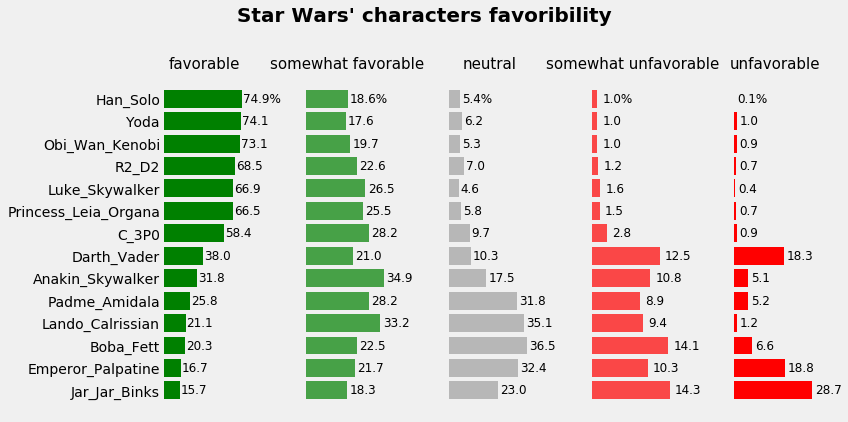

In [33]:
# visualize the characters' favoribility data
import matplotlib.style as style
style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
color = ['green','green','gray','red','red']
intensity = [1,0.7,0.5,0.7,1]
for i in range(len(categories)):
    ax = fig.add_subplot(1,5,i+1)
    ax.barh(characters_freq['characters'], characters_freq[categories[i]],
            color = color[i], alpha = intensity[i])
    ax.set_title(categories[i].replace('_',' '), fontsize = 15, fontweight = 'medium')
    ax.grid(False)
    plt.xticks(characters_freq[categories[i]], '')
    for idx, val in characters_freq[categories[i]].iteritems():
        if idx == 13:
            ax.text(val+1, idx, str(val)+'%', va = 'center', fontsize = 12)
        else:
            ax.text(val+1, idx, str(val), va = 'center', fontsize = 12)
    if i > 0:
        ax.tick_params(labelleft = False)
    for pos, spine in ax.spines.items():
        spine.set_visible(False)
plt.suptitle("Star Wars' characters favoribility", fontsize = 20, fontweight = 'bold')
plt.tight_layout(rect=[0,0,1,0.9])
plt.show()

Han Solo, Yoda are the top favorable characters while Emperror Palpatine and Jar Jar Blinks are on the bottom of the list.

# Conclusion
The project's goal is to identify the most favorite episode, also the most favorable characters throught the series of six original Star Wars movies.

We found out episode V is the best of the bunch. 

Han Solo and Yoda undeniably are the most favorable characters in order.